We first set the styles and import the needed libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the results
df = pd.read_csv('torus_mv_results.csv')
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   dimension  vertices  edges  max_mv_size  search_limit  \
0          3         9     18            6             9   
1          4        16     32            9            12   
2          5        25     50           10            15   

                    timestamp  
0  2025-07-10T18:19:54.853068  
1  2025-07-10T18:20:02.915817  
2  2025-07-10T18:40:06.170338  


Basic data exploration:

In [2]:
print("Dataset Info:")
print(f"Dimensions analyzed: {df['dimension'].min()} to {df['dimension'].max()}")
print(f"Total data points: {len(df)}")
print("\nData summary:")
print(df.describe())

# Check for any failed computations
failed = df[df['max_mv_size'] == -1]
if len(failed) > 0:
    print(f"\nFailed computations for dimensions: {failed['dimension'].tolist()}")
else:
    print("\nAll computations completed successfully!")

Dataset Info:
Dimensions analyzed: 3 to 5
Total data points: 3

Data summary:
       dimension   vertices      edges  max_mv_size  search_limit
count        3.0   3.000000   3.000000     3.000000           3.0
mean         4.0  16.666667  33.333333     8.333333          12.0
std          1.0   8.020806  16.041613     2.081666           3.0
min          3.0   9.000000  18.000000     6.000000           9.0
25%          3.5  12.500000  25.000000     7.500000          10.5
50%          4.0  16.000000  32.000000     9.000000          12.0
75%          4.5  20.500000  41.000000     9.500000          13.5
max          5.0  25.000000  50.000000    10.000000          15.0

All computations completed successfully!


Main plot - $\mu(T_{m,m})$ vs dimension $m$:

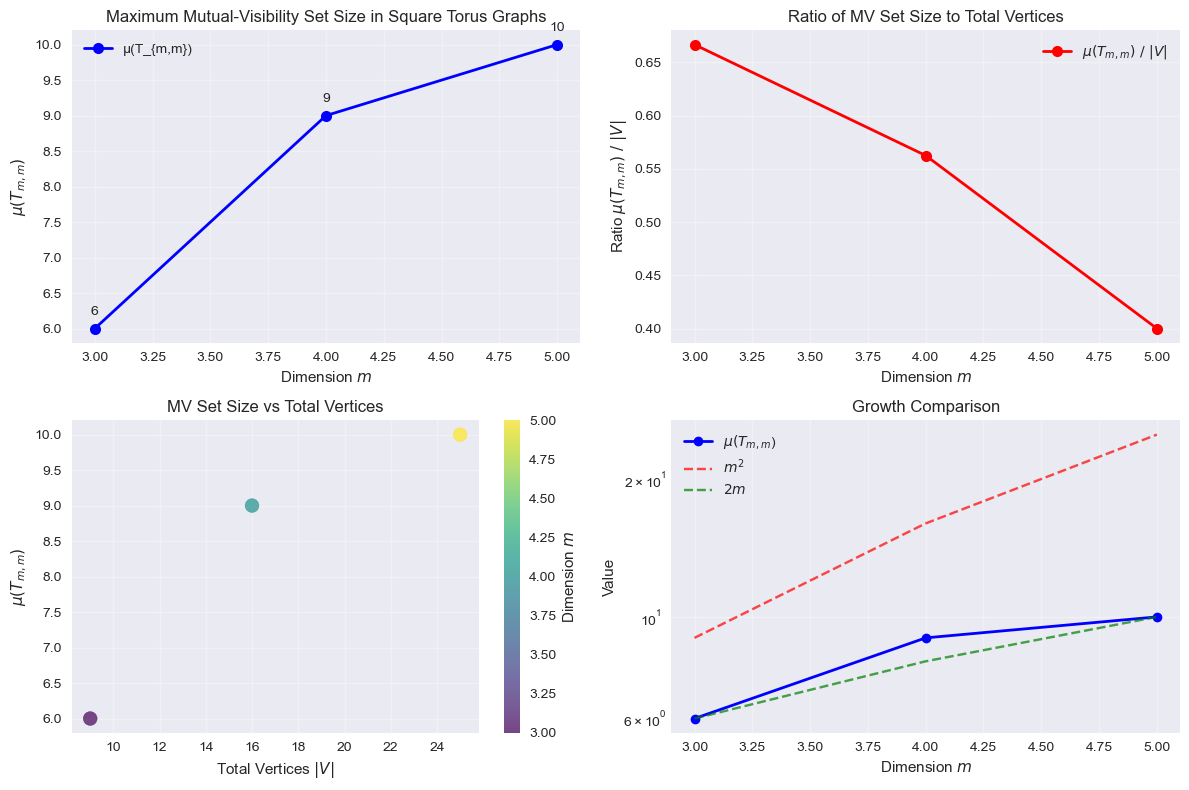

In [10]:
plt.figure(figsize=(12, 8))

# Filter out failed computations
valid_data = df[df['max_mv_size'] > 0]

# Main plot
plt.subplot(2, 2, 1)
plt.plot(valid_data['dimension'], valid_data['max_mv_size'], 
         'bo-', linewidth=2, markersize=8, label='μ(T_{m,m})')
plt.xlabel('Dimension $m$')
plt.ylabel('$\\mu(T_{m,m})$')
plt.title('Maximum Mutual-Visibility Set Size in Square Torus Graphs')
plt.grid(True, alpha=0.3)
plt.legend()

# Add value labels on points
for _, row in valid_data.iterrows():
    plt.annotate(f'{int(row["max_mv_size"])}', 
                (row['dimension'], row['max_mv_size']),
                textcoords="offset points", xytext=(0,10), ha='center')

# Ratio plot
plt.subplot(2, 2, 2)
valid_data['ratio'] = valid_data['max_mv_size'] / valid_data['vertices']
plt.plot(valid_data['dimension'], valid_data['ratio'], 
         'ro-', linewidth=2, markersize=8, label='$\\mu(T_{m,m})\\ /\\ |V|$')
plt.xlabel('Dimension $m$')
plt.ylabel('Ratio $\\mu(T_{m,m})\\ /\\ |V|$')
plt.title('Ratio of MV Set Size to Total Vertices')
plt.grid(True, alpha=0.3)
plt.legend()

# Vertices vs MV size
plt.subplot(2, 2, 3)
plt.scatter(valid_data['vertices'], valid_data['max_mv_size'], 
           s=100, alpha=0.7, c=valid_data['dimension'], cmap='viridis')
plt.xlabel('Total Vertices $|V|$')
plt.ylabel('$\\mu(T_{m,m})$')
plt.title('MV Set Size vs Total Vertices')
plt.colorbar(label='Dimension $m$')
plt.grid(True, alpha=0.3)

# Growth comparison
plt.subplot(2, 2, 4)
plt.plot(valid_data['dimension'], valid_data['max_mv_size'], 
         'bo-', label='$\\mu(T_{m,m}$)', linewidth=2)
plt.plot(valid_data['dimension'], valid_data['dimension']**2, 
         'r--', label='$m^2$', alpha=0.7)
plt.plot(valid_data['dimension'], 2*valid_data['dimension'], 
         'g--', label='$2m$', alpha=0.7)
plt.xlabel('Dimension $m$')
plt.ylabel('Value')
plt.title('Growth Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

Publication-ready plots:

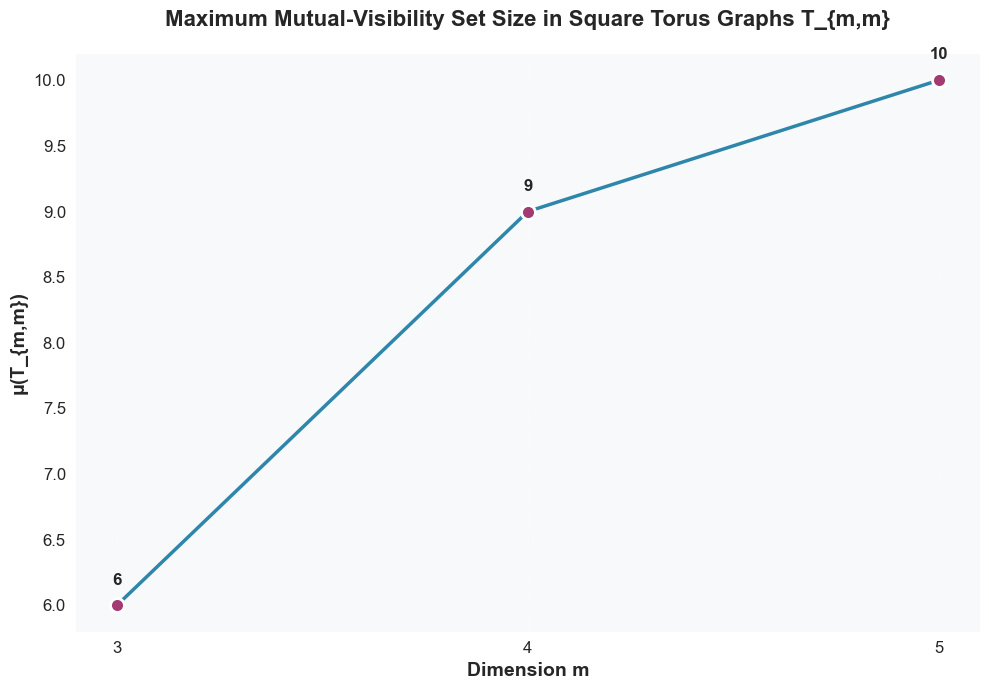

Plot saved as 'torus_mv_plot.png'


<Figure size 800x550 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 7))

# Main plot with error bars (if you have multiple runs)
plt.errorbar(valid_data['dimension'], valid_data['max_mv_size'], 
             fmt='o-', linewidth=2.5, markersize=10, capsize=5,
             color='#2E86AB', markerfacecolor='#A23B72', 
             markeredgecolor='white', markeredgewidth=2)

# Add value annotations
for _, row in valid_data.iterrows():
    plt.annotate(f'{int(row["max_mv_size"])}', 
                (row['dimension'], row['max_mv_size']),
                textcoords="offset points", xytext=(0,15), 
                ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Dimension m', fontsize=14, fontweight='bold')
plt.ylabel('μ(T_{m,m})', fontsize=14, fontweight='bold')
plt.title('Maximum Mutual-Visibility Set Size in Square Torus Graphs T_{m,m}', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(valid_data['dimension'], fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle background
plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('torus_mv_plot.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("Plot saved as 'torus_mv_plot.png'")

In [13]:
# Data table for reference
print("Complete Results Table:")
print("=" * 50)
display_df = valid_data[['dimension', 'vertices', 'max_mv_size', 'ratio']].copy()
display_df.columns = ['Dimension m', 'Vertices |V|', 'μ(T_{m,m})', 'Ratio']
display_df['Ratio'] = display_df['Ratio'].round(4)
print(display_df.to_string(index=False))

Complete Results Table:


KeyError: "['ratio'] not in index"